## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

# Load dataset
url = "https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1"
df = pd.read_csv(url)

# Convert diagnosis to binary: 1 = Disease, 0 = No Disease
df["disease"] = (df["diagnosis"] == "Disease").astype(int)

# Keep only predictors for this assignment
X = df[["age", "chol"]]
y = df["disease"]

df.head()



,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis,disease
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease,0
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease,1
2,Miles Wolf,62,0,3,130,263,1,97,No Disease,0
3,Mikaila Block,43,1,1,115,303,1,181,Disease,1
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease,1


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [9]:

logit = LogisticRegression()
logit.fit(X, y)

# Extract coefficients
b0 = logit.intercept_[0]
b_age, b_chol = logit.coef_[0]

print("Logistic Regression coefficients:")
print("Intercept:", b0)
print("Age coef:", b_age)
print("Chol coef:", b_chol)

age_fixed = 55

# p = 0.5 → logit = 0
chol_at_50 = -(b0 + b_age * age_fixed) / b_chol

# p = 0.9 → logit = log(.9/.1)
log_odds_90 = np.log(0.9 / 0.1)
chol_at_90 = (log_odds_90 - b0 - b_age * age_fixed) / b_chol

print("\nFor a 55-year-old:")
print("Cholesterol threshold for p = 0.5 (predict Disease):", chol_at_50)
print("Cholesterol threshold for p = 0.9:", chol_at_90)


Logistic Regression coefficients:
Intercept: 3.2401122588590714
Age coef: -0.0468633061303684
Chol coef: -0.001801238519029135

For a 55-year-old:
Cholesterol threshold for p = 0.5 (predict Disease): 367.8748897985851
Cholesterol threshold for p = 0.9: -851.9660996782114


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [10]:

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

lda_b0   = lda.intercept_[0]
lda_age  = lda.coef_[0][0]
lda_chol = lda.coef_[0][1]

print("LDA coefficients:")
print("Intercept:", lda_b0)
print("Age coef:", lda_age)
print("Chol coef:", lda_chol)

age_fixed = 55

# Decision boundary = 0
chol_lda = -(lda_b0 + lda_age * age_fixed) / lda_chol

print("\nFor a 55-year-old:")
print("Cholesterol threshold for LDA to predict Disease:", chol_lda)


LDA coefficients:
Intercept: 3.2196776604068784
Age coef: -0.04655743553694484
Chol coef: -0.0017896671039291316

For a 55-year-old:
Cholesterol threshold for LDA to predict Disease: 368.23535752993797


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [7]:

svc = SVC(kernel="linear")

param_grid = {"C": [0.01, 0.1, 1, 5, 10, 50, 100]}
grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(X, y)

svc_best = grid.best_estimator_
print("Best C value:", grid.best_params_)

svc_b0   = svc_best.intercept_[0]
svc_age  = svc_best.coef_[0][0]
svc_chol = svc_best.coef_[0][1]

print("SVC coefficients:")
print("Intercept:", svc_b0)
print("Age coef:", svc_age)
print("Chol coef:", svc_chol)

age_fixed = 55

chol_svc = -(svc_b0 + svc_age * age_fixed) / svc_chol

print("\nFor a 55-year-old:")
print("Cholesterol threshold for SVC to predict Disease:", chol_svc)


Best C value: {'C': 0.1}
SVC coefficients:
Intercept: 4.685940390605528
Age coef: -0.06440156302363764
Chol coef: -0.0036579703527195306

For a 55-year-old:
Cholesterol threshold for SVC to predict Disease: 312.7019396029427


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

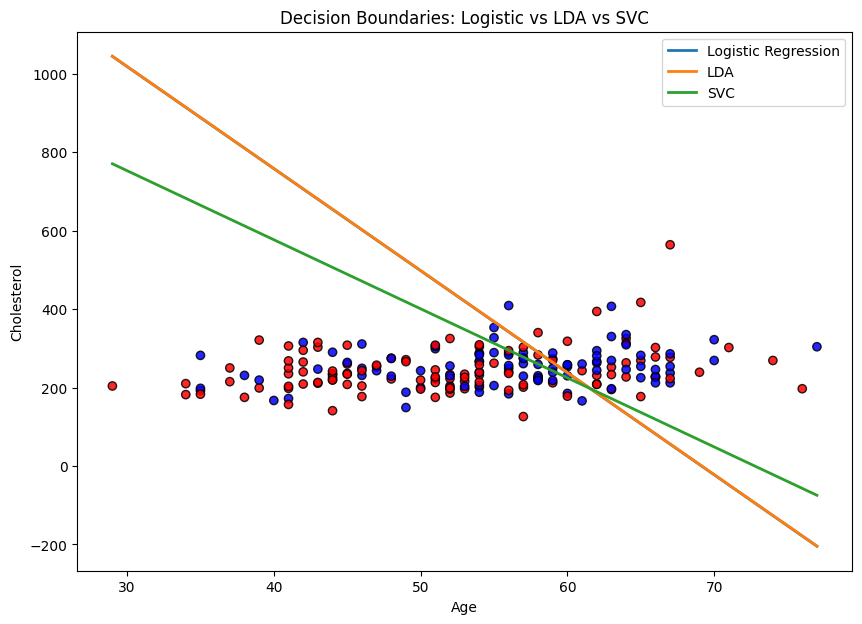

In [11]:

plt.figure(figsize=(10,7))

# Scatter plot of data
plt.scatter(
    df["age"], df["chol"],
    c=df["disease"], cmap="bwr",
    edgecolor="k", alpha=0.85
)

plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("Decision Boundaries: Logistic vs LDA vs SVC")

# Age range for drawing lines
age_vals = np.linspace(df["age"].min(), df["age"].max(), 200)

# Logistic boundary
chol_logit = -(b0 + b_age * age_vals) / b_chol
plt.plot(age_vals, chol_logit, label="Logistic Regression", linewidth=2)

# LDA boundary
chol_lda_line = -(lda_b0 + lda_age * age_vals) / lda_chol
plt.plot(age_vals, chol_lda_line, label="LDA", linewidth=2)

# SVC boundary
chol_svc_line = -(svc_b0 + svc_age * age_vals) / svc_chol
plt.plot(age_vals, chol_svc_line, label="SVC", linewidth=2)

plt.legend()
plt.show()
